In [1]:
#Start by importing necessary packages, for now: Pandas and NumPy.
#Import all the files, we will be using IMDB and Box Office Mojo statistics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [2]:
#Question 3: What do the number of movies made and movie rating profiles look across genres, and do they reveal any trends about each other?
#Start by cleaning up the title dataframe by dropping all rows with unecessary/missing values, (large data set, dropping is fine)
#Creating a list with all the unique genres
title = title.dropna()
genres = []
for x in title['genres']:
    for g in x.strip('[]').split(','):
        if not g in genres:
            genres.append(g)
genres.sort()
genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [3]:
#Creating a column for each unique genre in the title dataframe, with boolean values
for genre in genres:
    title[genre] = title['genres'].apply(lambda x: genre in x)

In [4]:
#Understand the current dataframe
pd.set_option('max_columns', None)
title.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Creating a master/larger data frame to make it easier for future reference.
ratings = ratings.set_index(['tconst'])
ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [6]:
#This is the master dataframe with required columns.
master = title.set_index(['tconst']).join(ratings, how='left').drop(['original_title', 'start_year'], axis=1)
master.head(5)

,primary_title,runtime_minutes,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averagerating,numvotes
tconst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,175.0,"Action,Crime,Drama",True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.0,77.0
tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,43.0
tt0069049,The Other Side of the Wind,122.0,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,4517.0
tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.5,119.0
tt0111414,A Thin Life,75.0,Comedy,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN


In [7]:
#Creating a dictionary summing the boolean values for each genre; counting them and to get a total.
dct = {}
for genre in genres:
    dct[genre] = title[genre].sum()
dct

{'Action': 8110,
 'Adult': 7,
 'Adventure': 5740,
 'Animation': 2292,
 'Biography': 8241,
 'Comedy': 20843,
 'Crime': 5851,
 'Documentary': 43586,
 'Drama': 41621,
 'Family': 5608,
 'Fantasy': 2940,
 'Game-Show': 2,
 'History': 5793,
 'Horror': 8606,
 'Music': 4829,
 'Musical': 1140,
 'Mystery': 4143,
 'News': 1524,
 'Reality-TV': 60,
 'Romance': 7782,
 'Sci-Fi': 2727,
 'Short': 10,
 'Sport': 1949,
 'Talk-Show': 19,
 'Thriller': 9720,
 'War': 1229,
 'Western': 388}

In [8]:
#First locate the ratings for each inidivudal genre in the data frame, then create a loop that adds the values into
#a dictionary
master.loc[master['Western'] == True]['averagerating'].mean()

5.82421875

In [10]:
#Creating a dictionary that takes the average ratings given for each movie in a genre.
rate_dict = {}
for genre in genres:
    rate_dict[genre] = master.loc[master[genre] == True]['averagerating'].mean()
rate_dict

{'Action': 5.784437033508019,
 'Adult': 3.95,
 'Adventure': 6.178873239436619,
 'Animation': 6.250835913312693,
 'Biography': 7.169184944489576,
 'Comedy': 6.014109836276912,
 'Crime': 6.110742277547257,
 'Documentary': 7.316787432259636,
 'Drama': 6.391691906740861,
 'Family': 6.401361807489942,
 'Fantasy': 5.894413407821229,
 'Game-Show': 7.3,
 'History': 7.048927514792899,
 'Horror': 4.9345380945496595,
 'Music': 6.927153404429861,
 'Musical': 6.524451410658307,
 'Mystery': 5.891346486673589,
 'News': 7.278782608695653,
 'Reality-TV': 6.6,
 'Romance': 6.14805890227577,
 'Sci-Fi': 5.431494140625,
 'Short': 8.8,
 'Sport': 6.964604185623293,
 'Talk-Show': nan,
 'Thriller': 5.592140313859949,
 'War': 6.573962264150943,
 'Western': 5.82421875}

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Count,8110.000000,7.00,5740.000000,2292.000000,8241.000000,20843.00000,5851.000000,43586.000000,41621.000000,5608.000000,2940.000000,2.0,5793.000000,8606.000000,4829.000000,1140.000000,4143.000000,1524.000000,60.0,7782.000000,2727.000000,10.0,1949.000000,19.0,9720.00000,1229.000000,388.000000
Rating,5.784437,3.95,6.178873,6.250836,7.169185,6.01411,6.110742,7.316787,6.391692,6.401362,5.894413,7.3,7.048928,4.934538,6.927153,6.524451,5.891346,7.278783,6.6,6.148059,5.431494,8.8,6.964604,NaN,5.59214,6.573962,5.824219


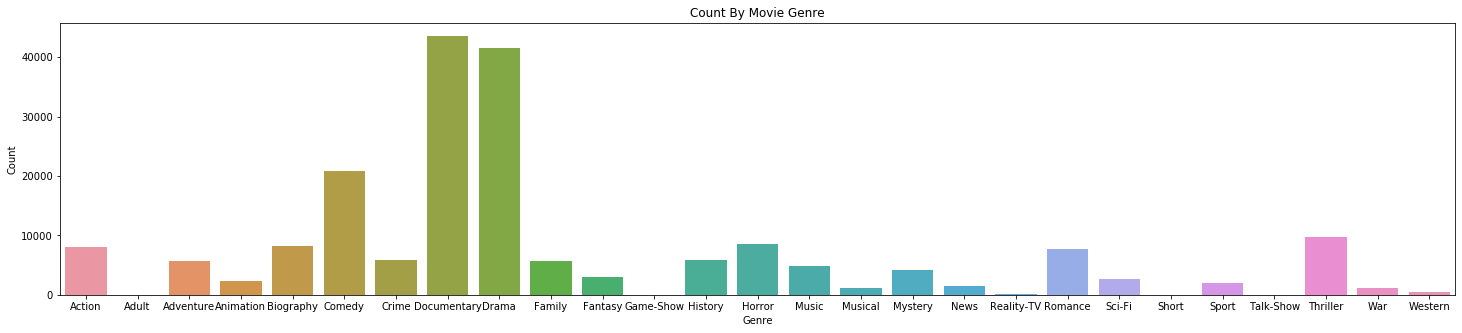

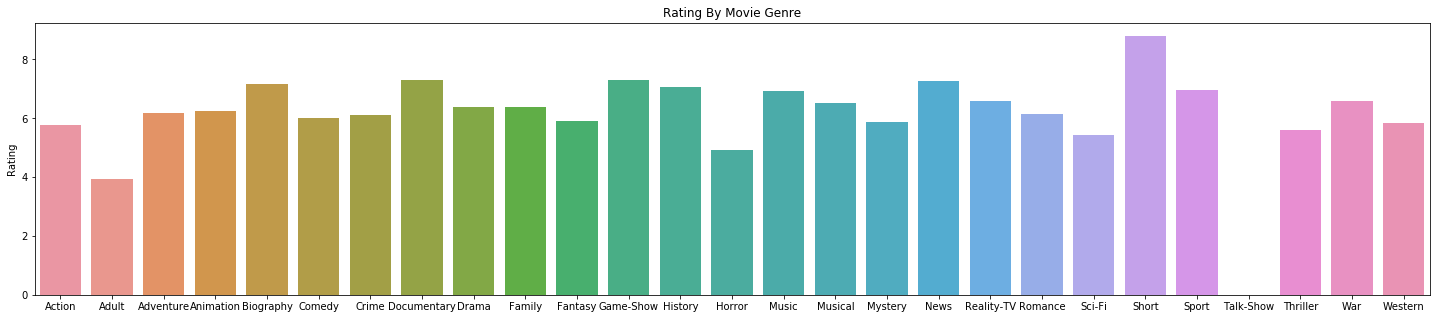

In [11]:
#Display a summary graphs that characterize genre profiles.
count_series = pd.Series(dct)
rate_series = pd.Series(rate_dict)

count_df = pd.merge(count_series.rename('Count'), rate_series.rename('Rating'), right_index = True, left_index = True)

count_df = count_df.T

display(count_df.head(5))

fig = plt.figure(figsize = (25, 5))

ax = sns.barplot(data = pd.DataFrame(count_df.loc['Count']).T)
ax.set_title('Count By Movie Genre')
ax.set(ylabel='Count', xlabel='Genre')
plt.show()

fig2 = plt.figure(figsize = (25, 5))
ax2 = sns.barplot(data = pd.DataFrame(count_df.loc['Rating']).T)
ax2.set_title('Rating By Movie Genre')
ax2.set_ylabel('Rating')
plt.show()

In [ ]:
#Question 3 - Findings:
#A profile visualization of movie ratings and number of movies in each genre.
#While movies in genres are produced more than others, those movies do not necessarily perform better based on ratings.
#In fact, short movies being produced the least, have the highest rating.

In [ ]:
#Question 4: #How do movies with lower vote counts fare against movies with higher vote counts 
#(looking at popularity and voting average)

In [68]:
#Start by dropping unecessary columns in the TMDB movies dataset.
movies = movies.set_index(['title']).drop(['Unnamed: 0','genre_ids','original_language','original_title'],axis=1)

In [69]:
#Remove values by locating movies with a higher than 0 average: because that means they received 0 votes and not important for our data.
movies = movies.loc[movies['vote_average'] > 0.0]
movies

,id,popularity,release_date,vote_average,vote_count
title,,,,,
Harry Potter and the Deathly Hallows: Part 1,12444,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,10191,28.734,2010-03-26,7.7,7610
Iron Man 2,10138,28.515,2010-05-07,6.8,12368
Toy Story,862,28.005,1995-11-22,7.9,10174
Inception,27205,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...
Two,561932,0.600,2018-02-04,1.0,1
President Evil,558305,0.600,2018-10-18,1.0,1
Vicktey Vitch (It's Halloween Poem),551756,0.600,2018-10-01,1.0,1


In [70]:
#Create a column for high or low votes determined if the vount count was greater or lower than the mean, respectively.
votes = ["High"]
for vote in votes:
    movies[vote] = movies['vote_count'].apply(lambda x: x > 194)

In [73]:
movies
#Something to keep in mind is that popularity is partially based on vote_count. We can see
#that the lower the vote_count, the lower the popularity score.

,id,popularity,release_date,vote_average,vote_count,High
title,,,,,,
Harry Potter and the Deathly Hallows: Part 1,12444,33.533,2010-11-19,7.7,10788,True
How to Train Your Dragon,10191,28.734,2010-03-26,7.7,7610,True
Iron Man 2,10138,28.515,2010-05-07,6.8,12368,True
Toy Story,862,28.005,1995-11-22,7.9,10174,True
Inception,27205,27.920,2010-07-16,8.3,22186,True
...,...,...,...,...,...,...
Two,561932,0.600,2018-02-04,1.0,1,False
President Evil,558305,0.600,2018-10-18,1.0,1,False
Vicktey Vitch (It's Halloween Poem),551756,0.600,2018-10-01,1.0,1,False


In [75]:
#Split the data into two categories, high or low vote counts to draw conclusions.
high_vote = movies.loc[movies['High'] == True]
low_vote = movies.loc[movies['High'] == False]
high_vote

,id,popularity,release_date,vote_average,vote_count,High
title,,,,,,
Harry Potter and the Deathly Hallows: Part 1,12444,33.533,2010-11-19,7.7,10788,True
How to Train Your Dragon,10191,28.734,2010-03-26,7.7,7610,True
Iron Man 2,10138,28.515,2010-05-07,6.8,12368,True
Toy Story,862,28.005,1995-11-22,7.9,10174,True
Inception,27205,27.920,2010-07-16,8.3,22186,True
...,...,...,...,...,...,...
All I See Is You,345923,7.312,2017-10-27,4.9,311,True
The Party,415401,7.233,2018-02-16,6.4,229,True
Dragon Ball Super: Broly,503314,6.868,2019-01-16,7.4,721,True


/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


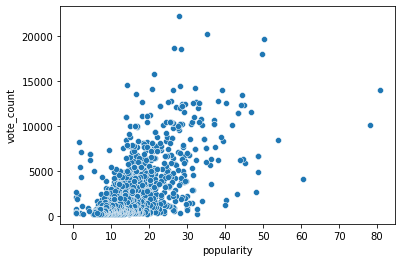

In [95]:
#Scatterplot relating the popularity and vote count for movies with higher than average vote counts.
sns.scatterplot(high_vote['popularity'], high_vote['vote_count'])

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


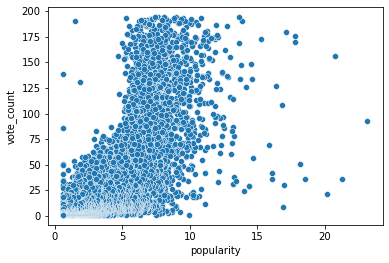

In [98]:
#Scatterplot relating the popularity and vote count for movies with lower than average vote counts.
sns.scatterplot(low_vote['popularity'], low_vote['vote_count'])

In [ ]:
#Looking at the visualizations, it demonstrates that there is no major correlation between popularity and vote count;
#however, there is a subtle positive correlation for the high vote counts. Therefore is seems that movies with
#high vote counts seem to fare better than movies with low vote counts.
#So, we can say that the vote count is directly correlated to the vote average and the popularity score. 

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


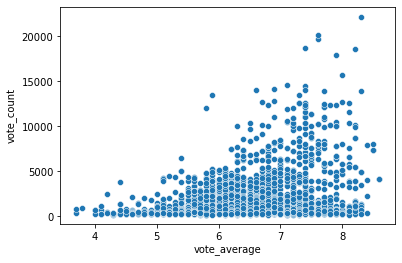

In [99]:
#Scatterplot relating the vote average and vote count for movies with higher than average vote counts.
sns.scatterplot(high_vote['vote_average'], high_vote['vote_count'])

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


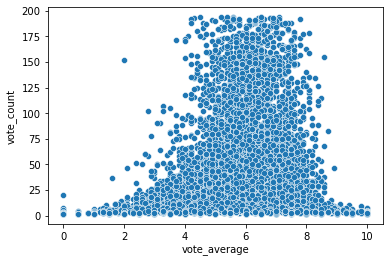

In [100]:
#Scatterplot relating the vote average and vote count for movies with lower than average vote counts.
sns.scatterplot(low_vote['vote_average'], low_vote['vote_count'])

In [ ]:
#Same thing, it seems that for low vote counts, the vote average doesn't reveal much of a trend. But, how high votes
#there is some positive correlation that as the vote average increases, the number of votes does as well.
#Question 4 - Findings:
#Both graphs for movies with higher vote counts illustrate a steady, positive correlation that as vote count increases
#the popularity and vote average increase as well.
#Yet for movies with lower vote counts, there is an obvious trend(barrier) that as the vote count increases, the popularity
#and vote average remain the same. 